In [1]:
!pip install econml

     |████████████████████████████████| 3.0MB 6.6MB/s 
     |████████████████████████████████| 133kB 37.4MB/s 
     |████████████████████████████████| 358kB 30.0MB/s 
     |████████████████████████████████| 81kB 7.9MB/s 
  Created wheel for shap: filename=shap-0.38.1-cp37-cp37m-linux_x86_64.whl size=490498 sha256=d13ab7c39debe73384eb735766167906abeace88737bd4415955f661167a8435
  Stored in directory: /root/.cache/pip/wheels/a8/fb/e4/88012be41842b9be62ae18d82d1b1e880daf8539d1fef1fa00
Successfully built shap
  Found existing installation: pydot 1.3.0
    Uninstalling pydot-1.3.0:
      Successfully uninstalled pydot-1.3.0


In [2]:
from econml.policy import PolicyTree
from econml.cate_interpreter import SingleTreePolicyInterpreter
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
Q = pd.read_csv("CATE average.csv", index_col=0)

In [4]:
Q

,job search,vocational,computer,language
1,-1.280430,2.556203,1.482988,0.885377
2,-1.171464,2.273266,2.403585,2.758233
3,-1.589187,2.933885,2.899676,2.048820
4,-1.285102,2.904400,4.035316,1.410639
5,-1.804006,2.012930,4.175508,0.424482
...,...,...,...,...
62557,-1.754338,2.213183,2.095295,3.119136
62558,-2.180696,2.489197,2.776620,2.639378
62559,-0.992194,3.140326,4.095090,1.963767
62560,-1.407170,3.003563,2.470632,3.149166


In [5]:
Q['nontr'] = 0
Q = Q[["nontr", "job search", "vocational", "computer", "language"]]

In [6]:
X = pd.read_csv("x_clean.csv", index_col=0)

In [30]:
X = X[["age", "female", "employability", "past_income", "gdp_pc", "unemp_rate"]]

In [19]:
policy = PolicyTree(honest=True, max_depth=6, random_state=0).fit(X, Q)

In [20]:
policy.feature_importances_

array([ 0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  8.60450514e-04,  0.00000000e+00,  8.78323978e-17,
        0.00000000e+00,  0.00000000e+00,  5.48952486e-17, -2.63497193e-14,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        4.49658380e-03,  9.21500148e-01,  0.00000000e+00,  0.00000000e+00,
        2.53825944e-02,  0.00000000e+00,  4.67163211e-02,  1.04390229e-03,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
        0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
       -2.19580995e-18,  0.00000000e+00])

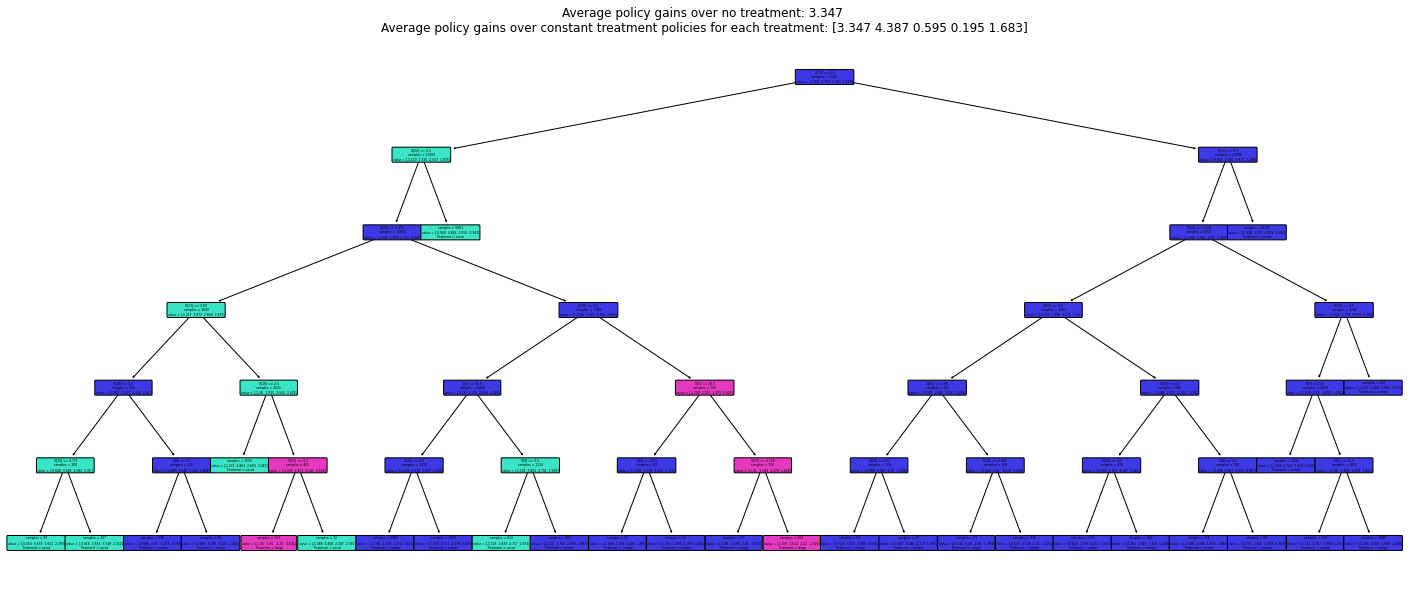

<Figure size 432x288 with 0 Axes>

In [21]:
plt.figure(figsize=(25,10))
policy.plot(treatment_names=['nontr', 'jobsh', 'vocat', 'compu', 'langu'])
plt.show()
plt.savefig("policy tree.png")

In [26]:
policy.predict([[0, 0, 1, 5, 2, 0]])

array([1])

In [35]:
Q.mean()

nontr         0.000000
job search   -1.039687
vocational    2.751877
computer      3.152447
language      1.664231
dtype: float64

In [ ]:
for i in range(len(X.columns)):
  print(i, X.columns[i])

0 age
1 female
2 employability
3 past_income
4 gdp_pc
5 unemp_rate
